# Day 2 - Decision Tree Regressor "classifier" (Optional)
Interestingly, you can use the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to do classification tasks as well

But instead of an integer of the specific class you would get a float as the predicted label.

You will use the dataset in *"diabetes.csv"*. It has several health related columns and the outcome of a diabetes test.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


### Build a classifier

#### 1. Read diabetes data.

In [3]:
df_dia = pd.read_csv("diabetes.csv")

#### 2. Explore and visualize data. Make conclusions.

In [4]:
print(df_dia.shape)
print(df_dia.columns)
df_dia.describe()

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


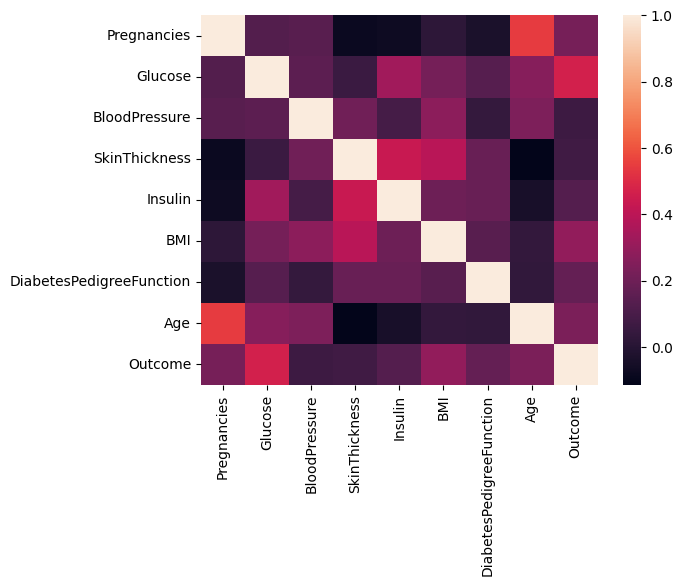

In [5]:
plt.Figure(figsize=(8,6))
sns.heatmap(df_dia.corr(), annot=False)
plt.show()

#### 3. Split the dataset in labels and features.

In [7]:
xc= df_dia.drop(columns=["Outcome"])
yc= df_dia["Outcome"]

#### 4. Split the dataset in training and test set (80% and 20%).

In [8]:
xc_train, xc_test, yc_train, yc_test = train_test_split(
    xc, yc, test_size=0.20, random_state=17, stratify=yc 
)

#### 5. Build a decision tree with some parameters for max depth and min samples and any of gini or entropy.

In [10]:
tree_reg = DecisionTreeRegressor(
    random_state=17,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="squared_error"
)

tree_reg.fit(xc_train, yc_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",17
,"max_lea

#### 6. Provide predictions for test set.

In [12]:
yc_pred_prob = tree_reg.predict(xc_test)
yc_pred = (yc_pred_prob >= 0.5).astype(int)
yc_pred[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

#### 7. Evaluate results.

[[76 24]
 [15 39]]


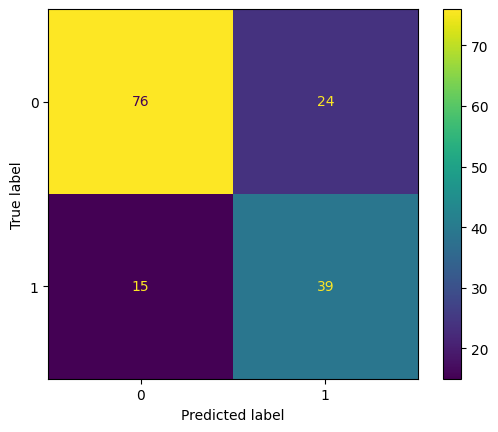

Accuracy : 0.7467532467532467
Precision: 0.6190476190476191
Recall   : 0.7222222222222222
F1-score : 0.6666666666666666


In [13]:
cm = metrics.confusion_matrix(yc_test, yc_pred)
print(cm)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Accuracy :", metrics.accuracy_score(yc_test, yc_pred))
print("Precision:", metrics.precision_score(yc_test, yc_pred))
print("Recall   :", metrics.recall_score(yc_test, yc_pred))
print("F1-score :", metrics.f1_score(yc_test, yc_pred))

#### 7. Visualize tree.

Use plot tree to visualize the tree. You can use figsize inside of plt.figure to control the size of the visualization.



In [14]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree

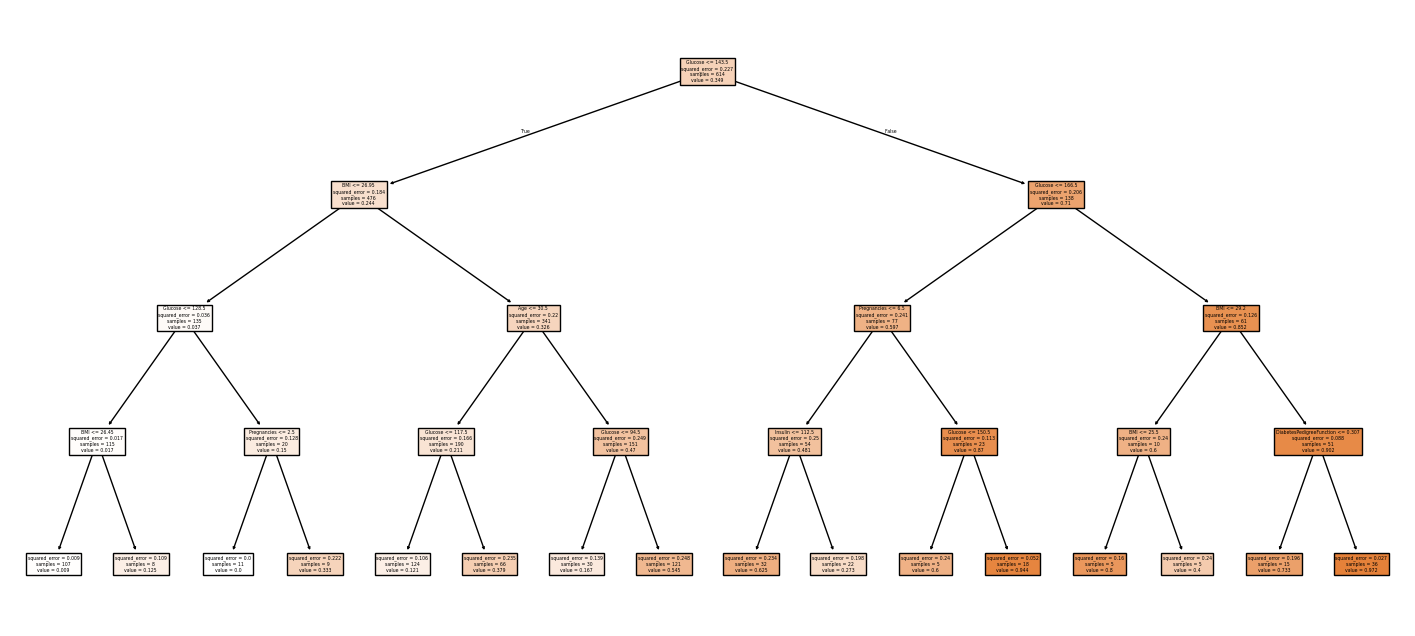

In [15]:
plt.figure(figsize=(18, 8))
plot_tree(
    tree_reg,
    feature_names=xc.columns,
    filled=True
)
plt.show()

# FINAL THOUGHTS
Answer the folowing questions:
- What is the possible benefit of using a regressor instead of a classifier?
- What drawbacks can you imagine when using a regressor to complete a non-binary classification?
- Which metric do you need to optimize the model for? Accuracy, Precision, Recall, F1? Why?

1. Regressor give values so we can choose own threshold to decide the class

2. Regressor is not for classification so have to manually convert values to 0,1 and reduce accuracy

3. Recall and F1 are importent for prediction because missing a patient is more serious than predict a false positive answer